# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
'''for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))'''

"for i in range(5):                                         # play game for 5 episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_info.rewards                 

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
from ddpg_agent import *
from model import *

In [6]:
num_agents = len(env_info.agents)

states = env_info.vector_observations
state_size = states.shape[1]
two_agent_state_size = state_size*2

action_size = brain.vector_action_space_size

In [7]:
agent_1 = Agent(state_size=two_agent_state_size, action_size=action_size, num_agents=1, random_seed=0)
agent_2 = Agent(state_size=two_agent_state_size, action_size=action_size, num_agents=1, random_seed=0)

In [8]:
def train(num_episodes=2000):
    
    episode_scores = []
    avg_scores_list = []
    
    scores_deque = deque(maxlen=100)
    goal_scores = 0.5  
    
    # loop for num_episodes
    for i_episode in range(1, num_episodes+1):

        # reset the unity environment at the beginning of each episode
        env_info = env.reset(train_mode=True)[brain_name]     

        # get initial state of the unity environment 
        states = env_info.vector_observations
        states = np.reshape(states, (1, 48)) # reshape so we can feed both agents states to each agent

        # reset each agent for a new episode
        agent_1.reset()
        agent_2.reset()

        # set the initial episode score to zero.
        agent_scores = np.zeros(num_agents)

        
        # During the while loop, the agents would output the actions for the current state and get the reward from the environment.
        # If any agent indicates the episode was done, then exit the loop
        while 1:
            # determine actions for the agents from current state, adding noise for exploration
            actions_1 = agent_1.act(states, add_noise=True)
            actions_2 = agent_2.act(states, add_noise=True)

            # send the actions to the agents in the environment and receive resultant environment information
            actions = np.concatenate((actions_1, actions_2), axis=0) 
            actions = np.reshape(actions, (1, 4))
            env_info = env.step(actions)[brain_name]

            next_states = env_info.vector_observations   # get the next states for each agent in the environment
            next_states = np.reshape(next_states, (1, 48))
            rewards = env_info.rewards                   # get the rewards for each agent in the environment
            dones = env_info.local_done                  # see if episode has finished for each agent in the environment

            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent_1.step(states, actions_1, rewards[0], next_states, dones[0])
            agent_2.step(states, actions_2, rewards[1], next_states, dones[1])

            # set new states to current states for determining next actions
            states = next_states
            
            # Update episode score for each agent
            agent_scores += rewards

            # If any agent indicates that the episode is done, then exit episode loop, to begin new episode
            if np.any(dones):
                break

        
        episode_scores.append(np.max(agent_scores))  # Add the max score selected from two agents scores list to totol scores list
        scores_deque.append(np.max(agent_scores))    # Add the max score selected from two agents scores list to the deque which the max length is 100
        avg_scores_deque = np.mean(scores_deque)     # Calculate the average score over last 100 consecutive episodes 


        #Print current and average score
        print('\nEpisode {}\tMax Score: {:.2f}, \tAverage Score of recent 100 consecutive episodes: {:.2f}'.format(i_episode, episode_scores[i_episode-1], avg_scores_deque), end="")
        
        if (i_episode % 100 == 0):
            avg_scores_list.append(avg_scores_deque)
            print('\nEpisode {}\tMax Score: {:.2f}, \tAverage Score of recent 100 consecutive episodes: {:.2f}'.format(i_episode, episode_scores[i_episode-1], avg_scores_deque), end="")
        
        # Save weights of Actor and Critic network for agent 1
        an_filename = "ddpgActor1_Model.pth"
        torch.save(agent_1.actor_local.state_dict(), an_filename)
        cn_filename = "ddpgCritic1_Model.pth"
        torch.save(agent_1.critic_local.state_dict(), cn_filename)

        # Save weights of Actor and Critic network for agent 2
        an_filename = "ddpgActor2_Model.pth"
        torch.save(agent_2.actor_local.state_dict(), an_filename)
        cn_filename = "ddpgCritic2_Model.pth"
        torch.save(agent_2.critic_local.state_dict(), cn_filename)

        # Check to see if the task is solved (i.e,. avearge_score > goal_scores over 100 episodes). 
        # If yes, save the network weights and scores and end training.
        if i_episode > 100 and avg_scores_deque >= goal_scores:
            avg_scores_list.append(avg_scores_deque)
            print('\nEnvironment solved in {:d} episodes!\tAverage Score of recent 100 consecutive episodes: {:.2f}'.format(i_episode, avg_scores_deque))

            # Save the recorded Scores data
            scores_filename = "ddpgAgent_Scores.csv"
            np.savetxt(scores_filename, episode_scores, delimiter=",")
            break
            
    return episode_scores, avg_scores_list


In [9]:
from workspace_utils import active_session

with active_session():
    # do long-running work here
    scores , average_scores_list = train(num_episodes=10000)


Episode 1	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 2	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 3	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 4	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 5	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 6	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 7	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 8	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 9	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 10	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 11	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 12	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00


Episode 193	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 194	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 195	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 196	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 197	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 198	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 199	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 200	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 200	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 201	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 202	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.00
Episode 203	Max Score: 0.00, 	Average Score of recent 100 consecu

Episode 383	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 384	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 385	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 386	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 387	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 388	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 389	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 390	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 391	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 392	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 393	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.01
Episode 394	Max Score: 0.00, 	Average Score of recent 100 consecu

Episode 573	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.04
Episode 574	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.04
Episode 575	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 576	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 577	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 578	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 579	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 580	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 581	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 582	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 583	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.03
Episode 584	Max Score: 0.00, 	Average Score of recent 100 consecu

Episode 763	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 764	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 765	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 766	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 767	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 768	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 769	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 770	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 771	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 772	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 773	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.07
Episode 774	Max Score: 0.10, 	Average Score of recent 100 consecu

Episode 953	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 954	Max Score: 0.20, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 955	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 956	Max Score: 0.09, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 957	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 958	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 959	Max Score: 0.20, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 960	Max Score: 0.00, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 961	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 962	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 963	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.09
Episode 964	Max Score: 0.30, 	Average Score of recent 100 consecu

Episode 1141	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1142	Max Score: 0.09, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1143	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1144	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1145	Max Score: 0.09, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1146	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1147	Max Score: 0.40, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1148	Max Score: 0.09, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1149	Max Score: 0.20, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1150	Max Score: 0.09, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1151	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.11
Episode 1152	Max Score: 0.09, 	Average Score of recent

Episode 1329	Max Score: 1.10, 	Average Score of recent 100 consecutive episodes: 0.33
Episode 1330	Max Score: 1.10, 	Average Score of recent 100 consecutive episodes: 0.33
Episode 1331	Max Score: 0.60, 	Average Score of recent 100 consecutive episodes: 0.34
Episode 1332	Max Score: 0.20, 	Average Score of recent 100 consecutive episodes: 0.34
Episode 1333	Max Score: 0.30, 	Average Score of recent 100 consecutive episodes: 0.34
Episode 1334	Max Score: 0.10, 	Average Score of recent 100 consecutive episodes: 0.34
Episode 1335	Max Score: 1.50, 	Average Score of recent 100 consecutive episodes: 0.35
Episode 1336	Max Score: 1.20, 	Average Score of recent 100 consecutive episodes: 0.36
Episode 1337	Max Score: 0.40, 	Average Score of recent 100 consecutive episodes: 0.36
Episode 1338	Max Score: 0.40, 	Average Score of recent 100 consecutive episodes: 0.37
Episode 1339	Max Score: 0.20, 	Average Score of recent 100 consecutive episodes: 0.37
Episode 1340	Max Score: 0.80, 	Average Score of recent

In [10]:
import matplotlib.pyplot as plt

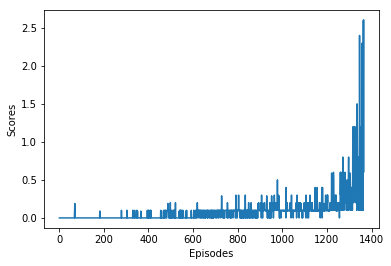

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel("Scores")
plt.xlabel("Episodes")
plt.show()

In [12]:
average_scores_list

[0.0029000000655651091,
 0.0009000000171363354,
 0.0010000000149011613,
 0.0088000001385807984,
 0.024600000381469728,
 0.018700000289827587,
 0.062800000980496401,
 0.080900001246482139,
 0.073900001142174002,
 0.11230000173673034,
 0.10800000172108412,
 0.12660000201314689,
 0.22700000341981649,
 0.51070000763982537]

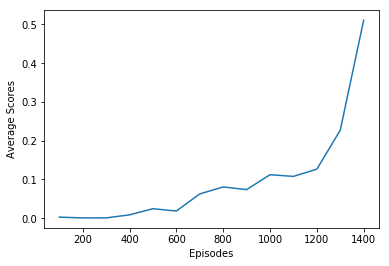

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(100*np.arange(1, len(average_scores_list)+1), average_scores_list)
plt.ylabel("Average Scores")
plt.xlabel("Episodes")
plt.show()

In [15]:
env.close()

# Zip the files

In [1]:
!!apt-get -y update && apt-get install -y zip

['Get:2 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu xenial InRelease [17.5 kB]',
 'Get:3 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]',
 'Get:1 http://dl.bintray.com/apache/cassandra 311x InRelease [3,183 B]',
 'Hit:4 http://archive.ubuntu.com/ubuntu xenial InRelease',
 'Get:5 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]',
 'Hit:6 https://deb.nodesource.com/node_11.x xenial InRelease',
 'Get:7 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]',
 'Get:8 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu xenial/main amd64 Packages [105 kB]',
 'Get:9 http://security.ubuntu.com/ubuntu xenial-security/main amd64 Packages [908 kB]',
 'Get:10 http://archive.ubuntu.com/ubuntu xenial-updates/main amd64 Packages [1,292 kB]',
 'Get:11 http://security.ubuntu.com/ubuntu xenial-security/universe amd64 Packages [573 kB]',
 'Get:12 http://security.ubuntu.com/ubuntu xenial-security/multiverse amd64 Packages [6,117 B]',
 '